<a href="https://colab.research.google.com/github/srita2003/DL_Practicals/blob/main/DL_Prac_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [32]:
# 1. Load dataset
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2]   # BMI feature only
y = diabetes.target

In [34]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Add bias term (x0 = 1)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [36]:
# 2. Gradient Descent Implementation
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def gradient_descent(X, y, learning_rate=0.1, n_iter=2000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    y = y.reshape(-1, 1)
    cost_history = []

    for _ in range(n_iter):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [37]:
# Run Gradient Descent
theta_gd, cost_history = gradient_descent(X_train_bias, y_train, learning_rate=0.1, n_iter=2000)

print("Gradient Descent Parameters:", theta_gd.ravel())

Gradient Descent Parameters: [153.11534766 359.33019951]


In [38]:
# 3. Evaluate Performance
y_train_pred = X_train_bias.dot(theta_gd)
y_test_pred = X_test_bias.dot(theta_gd)

print("Train MSE (GD):", mean_squared_error(y_train, y_train_pred))
print("Test MSE (GD):", mean_squared_error(y_test, y_test_pred))

# 4. Compare with Normal Equation (closed-form solution)
theta_ne = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)
print("Normal Equation Parameters:", theta_ne)

y_test_pred_ne = X_test_bias.dot(theta_ne)
print("Test MSE (Normal Equation):", mean_squared_error(y_test, y_test_pred_ne))

Train MSE (GD): 4764.810213436697
Test MSE (GD): 4339.931472083129
Normal Equation Parameters: [152.00335421 998.57768914]
Test MSE (Normal Equation): 4061.8259284949268


Text(0.5, 1.0, 'Gradient Descent Convergence')

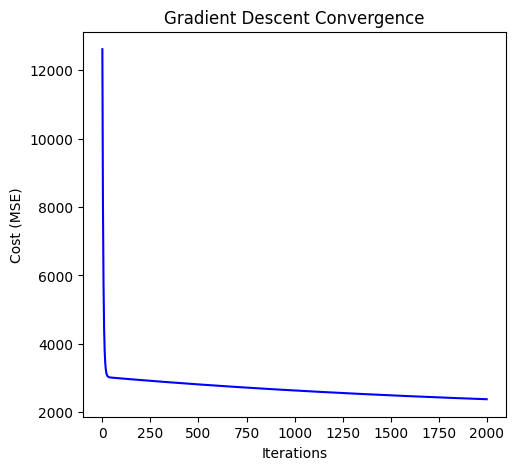

In [39]:
# 5. Plot convergence
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(cost_history, 'b-')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")

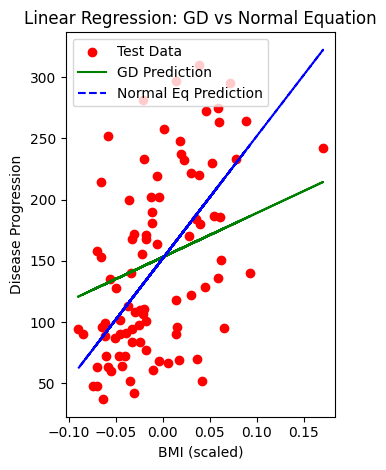

In [40]:
# 6. Plot regression lines
plt.subplot(1,2,2)
plt.scatter(X_test, y_test, color='red', label="Test Data")
plt.plot(X_test, y_test_pred, color='green', label="GD Prediction")
plt.plot(X_test, y_test_pred_ne, color='blue', linestyle='--', label="Normal Eq Prediction")
plt.xlabel("BMI (scaled)")
plt.ylabel("Disease Progression")
plt.legend()
plt.title("Linear Regression: GD vs Normal Equation")

plt.tight_layout()
plt.show()